## Project - Data Analysis

**This project is to analyze the data on the major crime indicators (MCI 2014 - 2018) reported by Toronto Police Service to gain insights.**


In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as pl
from datetime import datetime
%matplotlib inline

In [2]:
mci = pd.read_csv('C:/Users/Penny/Desktop/Data Science/Intro to Data Science/Project/MCI_2014_to_2018.csv' )
mci.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,ObjectId
0,-79.343094,43.668449,214,GO-20141948968,2014-04-24T11:29:00.000Z,2014-04-24T12:46:00.000Z,Commercial,1610,200,Robbery - Mugging,...,114.0,Thursday,11,Robbery,D55,68,North Riverdale (68),43.668449,-79.343094,1
1,-79.507927,43.759285,215,GO-20141950728,2014-04-24T13:00:00.000Z,2014-04-24T15:58:00.000Z,House,2120,200,B&E,...,114.0,Thursday,13,Break and Enter,D31,24,Black Creek (24),43.759285,-79.507927,2
2,-79.501663,43.697552,216,GO-20141956416,2014-04-25T13:20:00.000Z,2014-04-25T13:52:00.000Z,Apartment,1430,100,Assault,...,115.0,Friday,13,Assault,D12,30,Brookhaven-Amesbury (30),43.697552,-79.501663,3
3,-79.571510,43.721703,217,GO-20141956867,2014-04-24T17:00:00.000Z,2014-04-25T10:30:00.000Z,Outside,1430,100,Assault,...,114.0,Thursday,17,Assault,D23,4,Rexdale-Kipling (4),43.721703,-79.571510,4
4,-79.503487,43.663891,218,GO-20141957505,2014-04-25T16:00:00.000Z,2014-04-25T16:15:00.000Z,Apartment,1430,100,Assault,...,115.0,Friday,16,Assault,D11,114,Lambton Baby Point (114),43.663891,-79.503487,5


**Select useful attributes:**
There are 29 attributes in the dataset, not all of them make sense or are meaningful, our analysis will be based on the followings six attributes: occurrencedate, reporteddate, premisetype, occurrencedayofyear, occurrencedayofweek, occurrencehour, offence, MCI, Division.

In [3]:
mci = mci[['occurrencedate', 'reporteddate', 'premisetype', 'occurrencedayofyear', 'occurrencedayofweek', 
           'occurrencehour', 'offence', 'MCI', 'Division']]
mci.sample()

,occurrencedate,reporteddate,premisetype,occurrencedayofyear,occurrencedayofweek,occurrencehour,offence,MCI,Division
54117,2017-03-01T06:00:00.000Z,2017-03-01T19:35:00.000Z,Apartment,60.0,Wednesday,6,Assault,Assault,D22


**Define a function to extract date from the long list of occurrenc edate and reported date.**

In [4]:
def date_extract(date):
    return str(date).split('T')[0].strip()

**Convert the original occurrence date and reported date to actually date format.**

In [5]:
mci['occurrencedate'] = mci['occurrencedate'].apply(date_extract)
mci['reporteddate'] = mci['reporteddate'].apply(date_extract)

**After cleaning a bit, this is the new version of dataset we will be using:**

In [6]:
mci.sample()

,occurrencedate,reporteddate,premisetype,occurrencedayofyear,occurrencedayofweek,occurrencehour,offence,MCI,Division
19071,2016-12-03,2016-12-03,Apartment,338.0,Saturday,9,Assault,Assault,D55


**From 2014 to 2018, there are 167,525 observations (major crime incidents) reported by Toronto Police Service.**

In [7]:
mci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167525 entries, 0 to 167524
Data columns (total 9 columns):
occurrencedate         167525 non-null object
reporteddate           167525 non-null object
premisetype            167525 non-null object
occurrencedayofyear    167476 non-null float64
occurrencedayofweek    167476 non-null object
occurrencehour         167525 non-null int64
offence                167525 non-null object
MCI                    167525 non-null object
Division               167525 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 11.5+ MB


**Number of each crime type reported from 2014 - 2018:**

In [8]:
mci[['MCI']].groupby(['MCI']).size()

MCI
Assault            90878
Auto Theft         18178
Break and Enter    34911
Robbery            18128
Theft Over          5430
dtype: int64

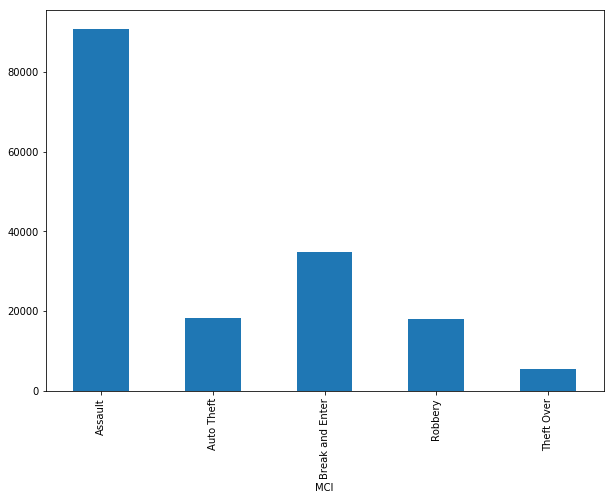

In [9]:
mci[['MCI']].groupby(['MCI']).size().plot(kind='bar', figsize=(10, 7))

In [10]:
crimes_in_division = pd.crosstab(mci['MCI'], mci['premisetype'])
crimes_in_division

premisetype,Apartment,Commercial,House,Other,Outside
MCI,,,,,
Assault,28491,14237,11642,14186,22322
Auto Theft,395,1815,4982,480,10506
Break and Enter,9238,10428,13156,2078,11
Robbery,1642,4184,526,1471,10305
Theft Over,823,1878,965,413,1351


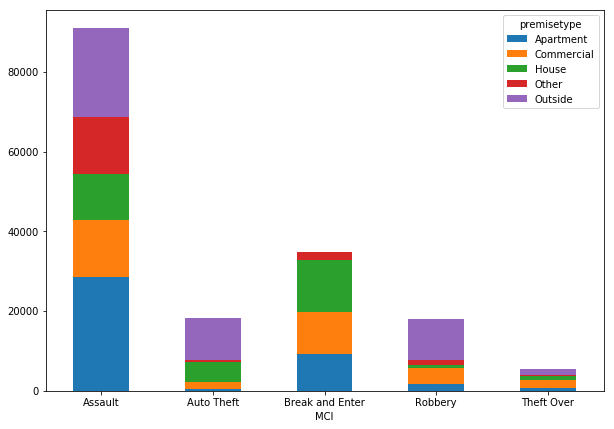

In [11]:
crimes_in_division.plot(kind='bar', stacked=True, rot = 0, figsize=(10, 7))